In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
#import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [4]:
DATASET_ID = 'koumura_bengalese_finch'

In [5]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

In [6]:
from avgn.signalprocessing.create_spectrogram_dataset import prepare_wav, create_label_df, get_row_audio

### create dataset

In [7]:
hparams = HParams(
    num_mel_bins = 64,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=15000,
    butter_lowcut = 500,
    butter_highcut = 15000,
    ref_level_db = 20,
    min_level_db = -30,
    mask_spec = True,
    win_length_ms = 10,
    hop_length_ms = 2,
    nex=-1,
    n_jobs=-1,
    verbosity = 1,
)

In [8]:
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    5.5s


[Parallel(n_jobs=-1)]: Done 2964 out of 2964 | elapsed:    6.0s finished


In [9]:
# subset and individual
# dataset.data_files = {key:value for key, value in tqdm(dataset.data_files.items()) if key.split('_')[0] == 'Bird5'}

In [10]:
dataset.data_files

{'Bird5_213': <avgn.dataset.DataFile at 0x7f0fb0f7c0b8>,
 'Bird5_16': <avgn.dataset.DataFile at 0x7f0fb10c2cc0>,
 'Bird5_227': <avgn.dataset.DataFile at 0x7f0fb0f7ccc0>,
 'Bird5_282': <avgn.dataset.DataFile at 0x7f0fb073af98>,
 'Bird5_147': <avgn.dataset.DataFile at 0x7f0fb1136438>,
 'Bird5_287': <avgn.dataset.DataFile at 0x7f0fb0f8b208>,
 'Bird5_24': <avgn.dataset.DataFile at 0x7f0fb0f8bc88>,
 'Bird5_160': <avgn.dataset.DataFile at 0x7f0fb0fa6518>,
 'Bird5_222': <avgn.dataset.DataFile at 0x7f0fb0fa6a58>,
 'Bird5_74': <avgn.dataset.DataFile at 0x7f0fb07449b0>,
 'Bird5_103': <avgn.dataset.DataFile at 0x7f0fb0744ef0>,
 'Bird5_44': <avgn.dataset.DataFile at 0x7f0fb0752ba8>,
 'Bird5_178': <avgn.dataset.DataFile at 0x7f0fb0f972b0>,
 'Bird5_159': <avgn.dataset.DataFile at 0x7f0fb0761e10>,
 'Bird5_72': <avgn.dataset.DataFile at 0x7f0fb0711518>,
 'Bird5_278': <avgn.dataset.DataFile at 0x7f0fb0711ac8>,
 'Bird5_210': <avgn.dataset.DataFile at 0x7f0fb06a80f0>,
 'Bird5_102': <avgn.dataset.DataFile

In [11]:
dataset.sample_json

OrderedDict([('species', 'Lonchura striata domestica'),
             ('common_name', 'Bengalese finch'),
             ('wav_loc',
              '/mnt/cube/Datasets/BengaleseFinch/Koumura_Okanoya-paper_data/Bird1/Wave/70.wav'),
             ('samplerate_hz', 32000),
             ('length_s', 21.543),
             ('indvs',
              OrderedDict([('Bird1',
                            OrderedDict([('notes',
                                          OrderedDict([('start_times',
                                                        [1.059,
                                                         1.208,
                                                         1.36,
                                                         1.477,
                                                         1.552,
                                                         1.692,
                                                         1.803,
                                                         1.88,
       

In [12]:
len(dataset.data_files)

335

#### Create dataset based upon JSON

In [13]:
from joblib import Parallel, delayed
n_jobs = -1; verbosity = 10

In [14]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(create_label_df)(
            dataset.data_files[key].data,
            hparams=dataset.hparams,
            labels_to_retain=['labels', 'sequence_num'],
            unit="notes",
            dict_features_to_retain = [],
            key = key,
        )
        for key in tqdm(dataset.data_files.keys())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1971s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 254 out of 335 | elapsed:    2.9s remaining:    0.9s


[Parallel(n_jobs=-1)]: Done 288 out of 335 | elapsed:    2.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 322 out of 335 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 335 out of 335 | elapsed:    3.0s finished


20525

In [15]:
syllable_df[:3]

start_time  end_time labels  sequence_num   indv  indvi        key
0       1.158     1.243      0             0  Bird5      0  Bird5_213
1       1.299     1.423      0             0  Bird5      0  Bird5_213
2       1.484     1.618      0             0  Bird5      0  Bird5_213

### get audio for dataset

In [16]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(get_row_audio)(
            syllable_df[syllable_df.key == key], 
            dataset.data_files[key].data['wav_loc'], 
            dataset.hparams
        )
        for key in tqdm(syllable_df.key.unique())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 322 out of 335 | elapsed:    3.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 335 out of 335 | elapsed:    3.7s finished


20525

In [17]:
df_mask  = np.array([len(i) > 0 for i in tqdm(syllable_df.audio.values)])

In [18]:
syllable_df = syllable_df[np.array(df_mask)]

In [19]:
syllable_df[:3]

start_time  end_time labels  sequence_num   indv  indvi        key  \
0       1.158     1.243      0             0  Bird5      0  Bird5_213   
1       1.299     1.423      0             0  Bird5      0  Bird5_213   
2       1.484     1.618      0             0  Bird5      0  Bird5_213   

                                               audio   rate  
0  [-4.603361468896738e-05, -0.000322993016252555...  32000  
1  [-0.0003559833352306803, -0.000295424427577348...  32000  
2  [-0.0001909911924789147, 0.0001359690424261159...  32000

In [20]:
sylls = syllable_df.audio.values

In [21]:
import librosa

In [22]:
syllable_df['audio'] = [librosa.util.normalize(i) for i in syllable_df.audio.values]

In [23]:
sylls = syllable_df['audio'].values

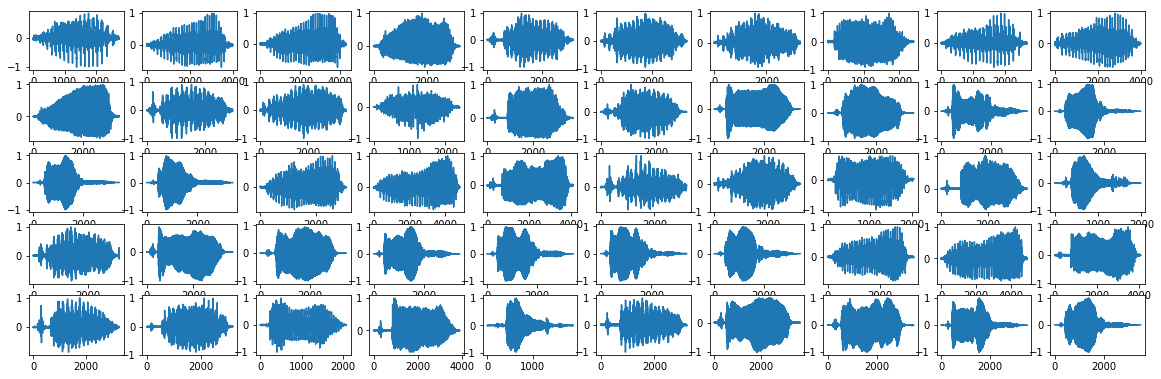

In [24]:
nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    ax.plot(syll)
    if i == nrows*ncols -1:
        break

### Create spectrograms

In [25]:
from avgn.visualization.spectrogram import draw_spec_set
from avgn.signalprocessing.create_spectrogram_dataset import make_spec, mask_spec, log_resize_spec, pad_spectrogram

In [26]:
syllables_wav = syllable_df.audio.values
syllables_rate = syllable_df.rate.values

In [27]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    # create spectrograms
    syllables_spec = parallel(
        delayed(make_spec)(
            syllable,
            rate,
            hparams=dataset.hparams,
            mel_matrix=dataset.mel_matrix,
            use_mel=True,
            use_tensorflow=False,
        )
        for syllable, rate in tqdm(
            zip(syllables_wav, syllables_rate),
            total=len(syllables_rate),
            desc="getting syllable spectrograms",
            leave=False,
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0539s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1100s.) Setting batch_size=20.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1876 tasks      | elapsed:    0.9s
[Parallel

[Parallel(n_jobs=-1)]: Done 19556 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 20525 out of 20525 | elapsed:    7.2s finished


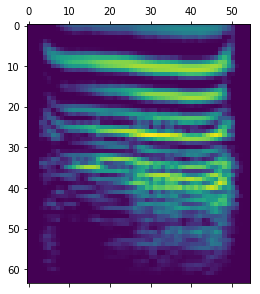

In [28]:
plt.matshow(syllables_spec[10])

### Rescale spectrogram
- using log rescaling

In [29]:
log_scaling_factor = 10

In [30]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllables_spec = parallel(
        delayed(log_resize_spec)(spec, scaling_factor=log_scaling_factor)
        for spec in tqdm(syllables_spec, desc="scaling spectrograms", leave=False)
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0160s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1356s.) Setting batch_size=70.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1270 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2460 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3790 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 5120 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 6590 tasks      | elapsed:    1.3s
[Paral

[Parallel(n_jobs=-1)]: Done 20525 out of 20525 | elapsed:    3.4s finished


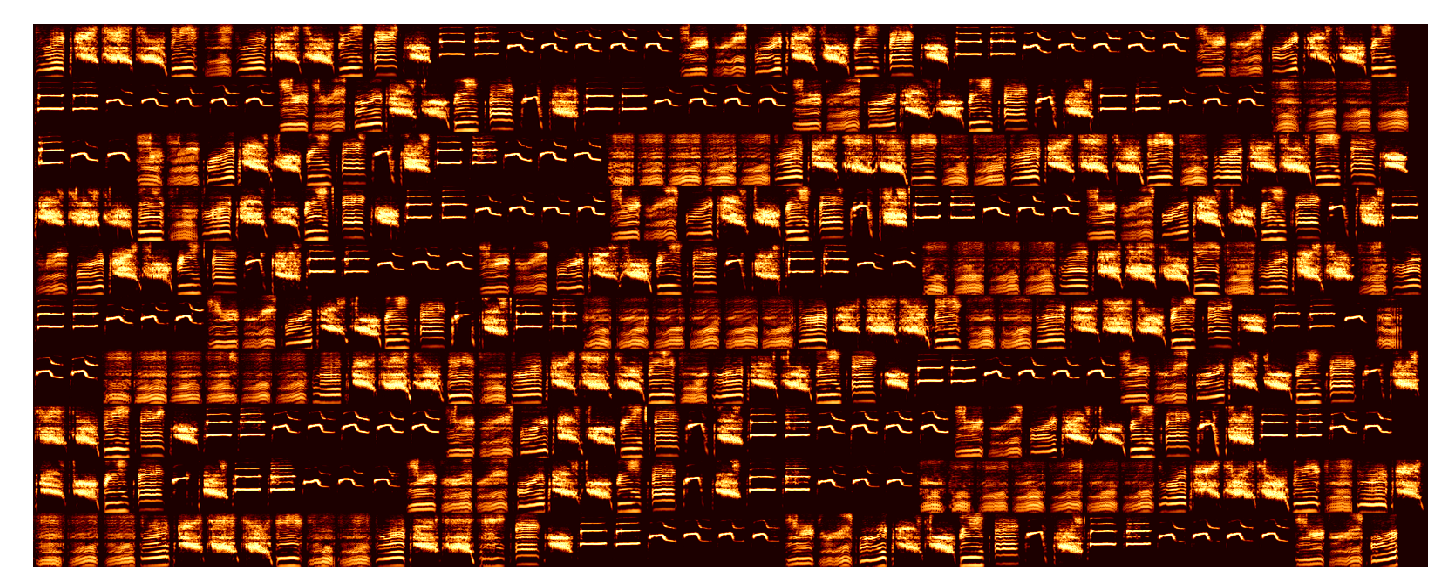

In [31]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [32]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
syllables_spec = [(norm(i)*255).astype('uint8') for i in tqdm(syllables_spec)]

### Pad spectrograms

In [33]:
syll_lens = [np.shape(i)[1] for i in syllables_spec]
pad_length = np.max(syll_lens)

In [34]:
syllable_df[:3]

start_time  end_time labels  sequence_num   indv  indvi        key  \
0       1.158     1.243      0             0  Bird5      0  Bird5_213   
1       1.299     1.423      0             0  Bird5      0  Bird5_213   
2       1.484     1.618      0             0  Bird5      0  Bird5_213   

                                               audio   rate  
0  [-0.0050082250789579156, -0.03514001095186631,...  32000  
1  [-0.021021711238164407, -0.017445555436483226,...  32000  
2  [-0.011490131937379718, 0.00817997006352913, 0...  32000

In [35]:
import seaborn as sns

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


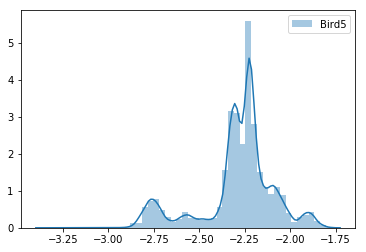

In [36]:
for indv in np.unique(syllable_df.indv):
    sns.distplot(np.log(syllable_df[syllable_df.indv==indv]["end_time"] - syllable_df[syllable_df.indv==indv]["start_time"]), label=indv)
plt.legend()

In [37]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:

    syllables_spec = parallel(
        delayed(pad_spectrogram)(spec, pad_length)
        for spec in tqdm(
            syllables_spec, desc="padding spectrograms", leave=False
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0121s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1440s.) Setting batch_size=88.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1672 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 4840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 6512 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 8360 tasks      | elapsed:    1.3s
[Para

[Parallel(n_jobs=-1)]: Done 16456 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 20525 out of 20525 | elapsed:    2.6s finished


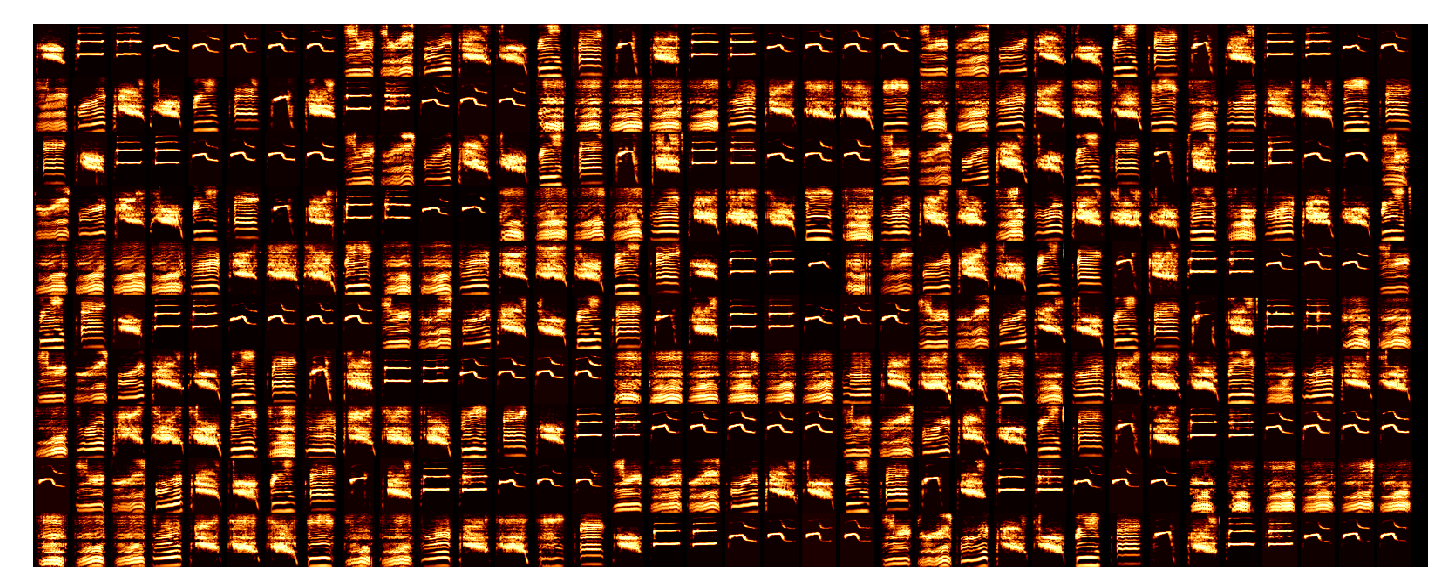

In [38]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [39]:
np.shape(syllables_spec)

(20525, 64, 44)

In [40]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
syllables_spec = [(norm(i)*255).astype('uint8') for i in tqdm(syllables_spec)]

In [41]:
# convert to uint8 to save space
syllable_df['spectrogram'] = syllables_spec

In [42]:
syllable_df[:3]

start_time  end_time labels  sequence_num   indv  indvi        key  \
0       1.158     1.243      0             0  Bird5      0  Bird5_213   
1       1.299     1.423      0             0  Bird5      0  Bird5_213   
2       1.484     1.618      0             0  Bird5      0  Bird5_213   

                                               audio   rate  \
0  [-0.0050082250789579156, -0.03514001095186631,...  32000   
1  [-0.021021711238164407, -0.017445555436483226,...  32000   
2  [-0.011490131937379718, 0.00817997006352913, 0...  32000   

                                         spectrogram  
0  [[0, 0, 0, 7, 6, 11, 12, 6, 10, 49, 55, 90, 41...  
1  [[0, 6, 6, 4, 30, 44, 47, 62, 90, 85, 53, 75, ...  
2  [[0, 7, 7, 7, 8, 18, 20, 44, 74, 53, 51, 50, 4...

### view syllables per indv

In [43]:
syllable_df.indv.unique()

array(['Bird5'], dtype=object)

Bird5 20525


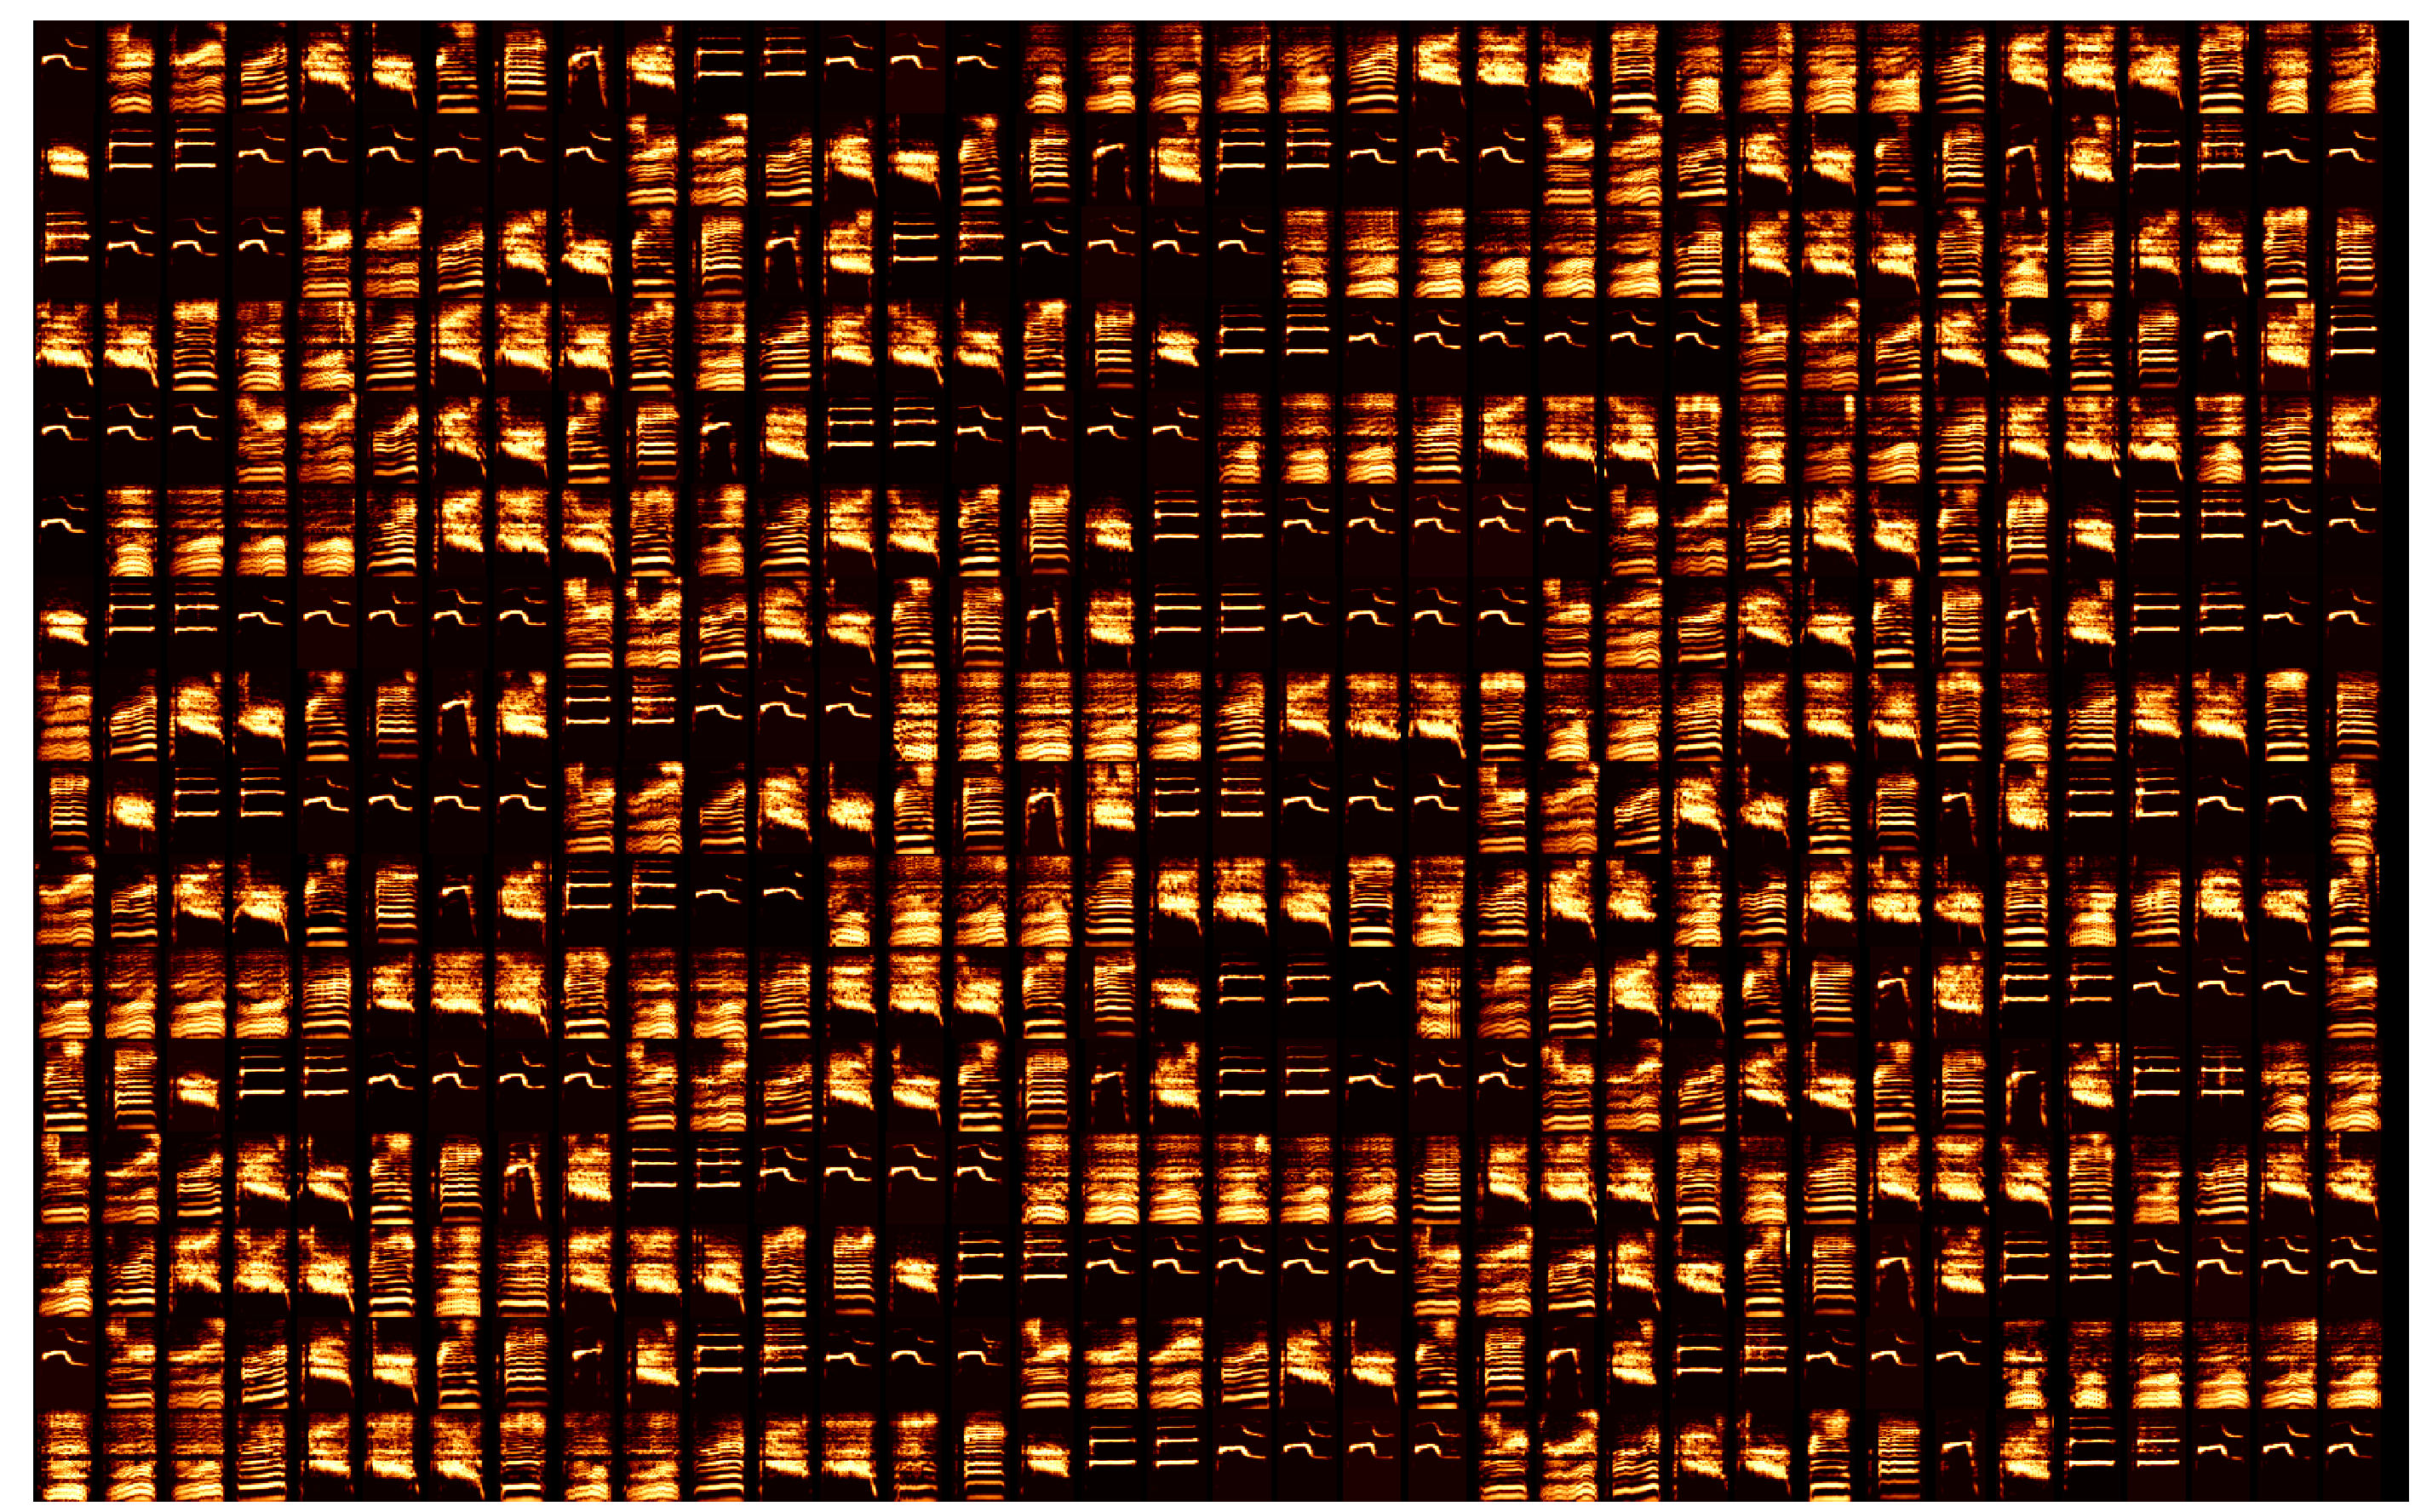

In [44]:
for indv in np.sort(syllable_df.indv.unique()):
    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array([i/np.max(i) for i in syllable_df[syllable_df.indv == indv].spectrogram.values])
    specs[specs<0] = 0
    draw_spec_set(specs, zoom=2,
                  maxrows=16, 
                  colsize=25)

In [45]:
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from cuml.manifold.umap import UMAP as cumlUMAP
from avgn.visualization.projections import scatter_spec


In [46]:
import umap

Bird5 20525


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/umap/rp_tree.py:439: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/umap/rp_tree.py (446)

File "../../../../../../../mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/umap/rp_tree.py", line 446:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving callee type: recurs

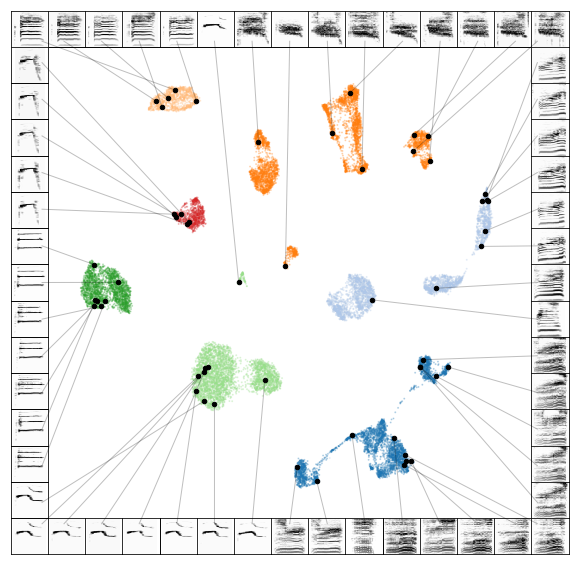

In [48]:
for indv in np.sort(syllable_df.indv.unique()):
    if indv != 'Bird5':
        continue
    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array([i/np.max(i) for i in syllable_df[syllable_df.indv == indv].spectrogram.values])
    
    specs_flattened = flatten_spectrograms(specs)
    fit = umap.UMAP(min_dist=0.25)
    z = list(fit.fit_transform(specs_flattened))

    #cuml_umap = cumlUMAP(min_dist=0.25)
    #z = list(cuml_umap.fit_transform(specs_flattened))
    
    scatter_spec(
        np.vstack(z),
        specs,
        column_size=15,
        #x_range = [-5.5,7],
        #y_range = [-10,10],
        pal_color="hls",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            'labels': list(syllable_df[syllable_df.indv == indv]['labels'].values),
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':1,
            'ls':"solid",
            'alpha':0.25,
        },
        draw_lines=True
    );
    plt.show()

### save dataset

In [ ]:
"""save_loc = DATA_DIR / 'syllable_dfs' / DATASET_ID / 'bf.pickle'
ensure_dir(save_loc)
syllable_df.drop('audio', 1).to_pickle(save_loc)"""